In [2]:
# Importing required librarires
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
train = pd.read_csv('Data/train.csv', index_col='id')

In [4]:
# Loading the data
test = pd.read_csv('Data/test.csv', index_col='id')
oil = pd.read_csv('Data/oil.csv', index_col='date')
stores = pd.read_csv('Data/stores.csv')
transactions = pd.read_csv('Data/transactions.csv')
holidays_event = pd.read_csv('Data/holidays_events.csv', index_col='date')

In [5]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [6]:
train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [7]:
# plt.figure(figsize=(15,15))
# plt.plot(train['date'], train['sales'])
# plt.xlabel('date')
# plt.ylabel('sales')

In [7]:
test

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...
3029395,2017-08-31,9,POULTRY,1
3029396,2017-08-31,9,PREPARED FOODS,0
3029397,2017-08-31,9,PRODUCE,1


In [8]:
train.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
train.shape

(3000888, 5)

In [11]:
test.shape

(28512, 4)

In [51]:
# y = train.sales
# y = pd.DataFrame(y)
# train1 = train.drop(['sales'], axis=1)
# train1

,date,store_nbr,family,onpromotion
id,,,,
0,2013-01-01,1,AUTOMOTIVE,0
1,2013-01-01,1,BABY CARE,0
2,2013-01-01,1,BEAUTY,0
3,2013-01-01,1,BEVERAGES,0
4,2013-01-01,1,BOOKS,0
...,...,...,...,...
3000883,2017-08-15,9,POULTRY,0
3000884,2017-08-15,9,PREPARED FOODS,1
3000885,2017-08-15,9,PRODUCE,148


In [10]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
train1 = pd.merge(train, stores, how='left', on='store_nbr')

In [16]:
#m1 = pd.merge(holidays_event, oil, on='date')
#m2 = pd.merge(train2, transactions, on='date')

In [12]:
train2 = pd.merge(train1, oil, how='left', on='date')
train2.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN


In [13]:
train2[["year", "month", "day"]] = train2["date"].str.split("-", expand = True).astype('int64')
from datetime import datetime
train2['date'] = pd.to_datetime(train2['date'], format = '%Y-%m-%d')

In [14]:
train2.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
city                   object
state                  object
type                   object
cluster                 int64
dcoilwtico            float64
year                    int64
month                   int64
day                     int64
dtype: object

In [15]:
# observed null values in dcoilwtico column and replacing those null values to mean
train2.loc[(train2.dcoilwtico.isnull()), 'dcoilwtico'] = train2.dcoilwtico.mean()

In [16]:
train2.to_csv('base_train.csv', index_label='id')

In [140]:
train2.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
year           0
month          0
day            0
dtype: int64

<AxesSubplot:xlabel='date', ylabel='sales'>

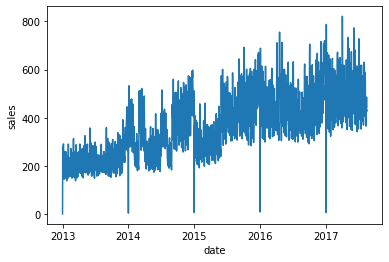

In [142]:
#Time Series plot of the sales data
sns.lineplot(x='date',y='sales',data=train2,ci=None,estimator='mean')

<AxesSubplot:xlabel='month', ylabel='sales'>

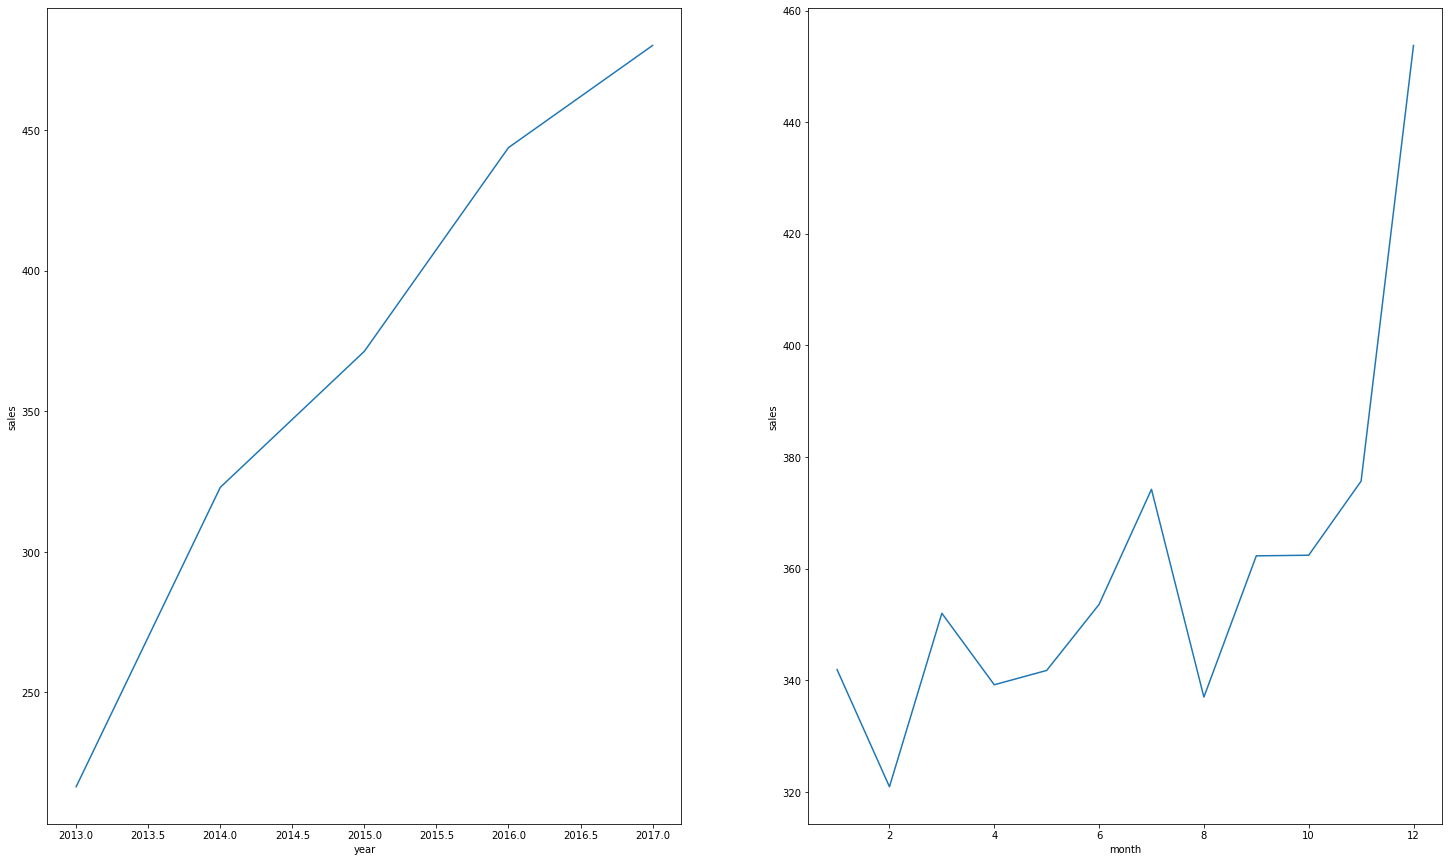

In [143]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.lineplot(x='year',y='sales',data=train2,ci=None,estimator='mean',ax=ax[0])
sns.lineplot(x='month',y='sales',data=train2,ci=None,estimator='mean',ax=ax[1])

<AxesSubplot:xlabel='month', ylabel='dcoilwtico'>

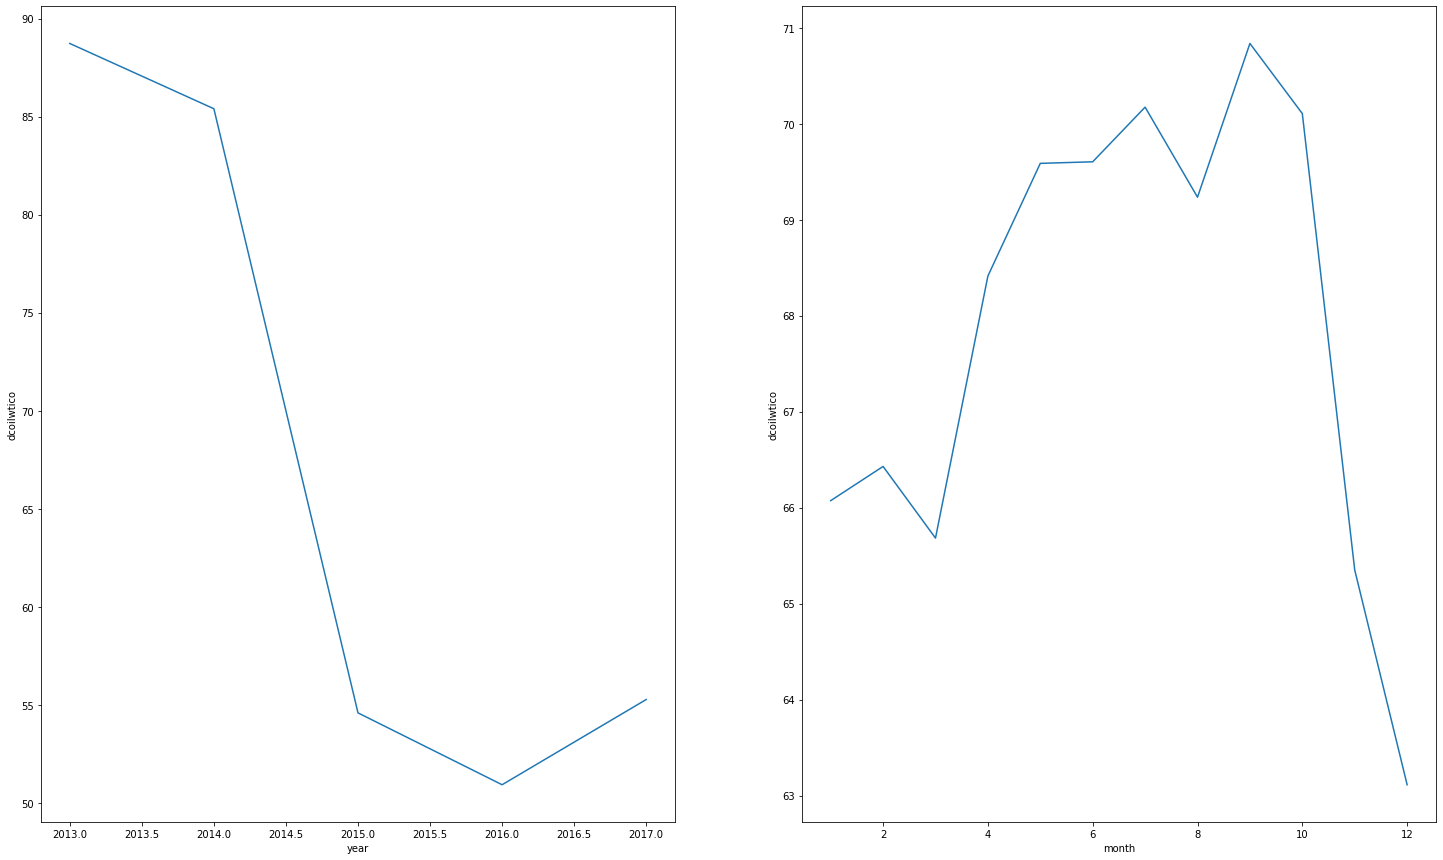

In [144]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.lineplot(x='year',y='dcoilwtico',data=train2,ci=None,estimator='mean',ax=ax[0])
sns.lineplot(x='month',y='dcoilwtico',data=train2,ci=None,estimator='mean',ax=ax[1])

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

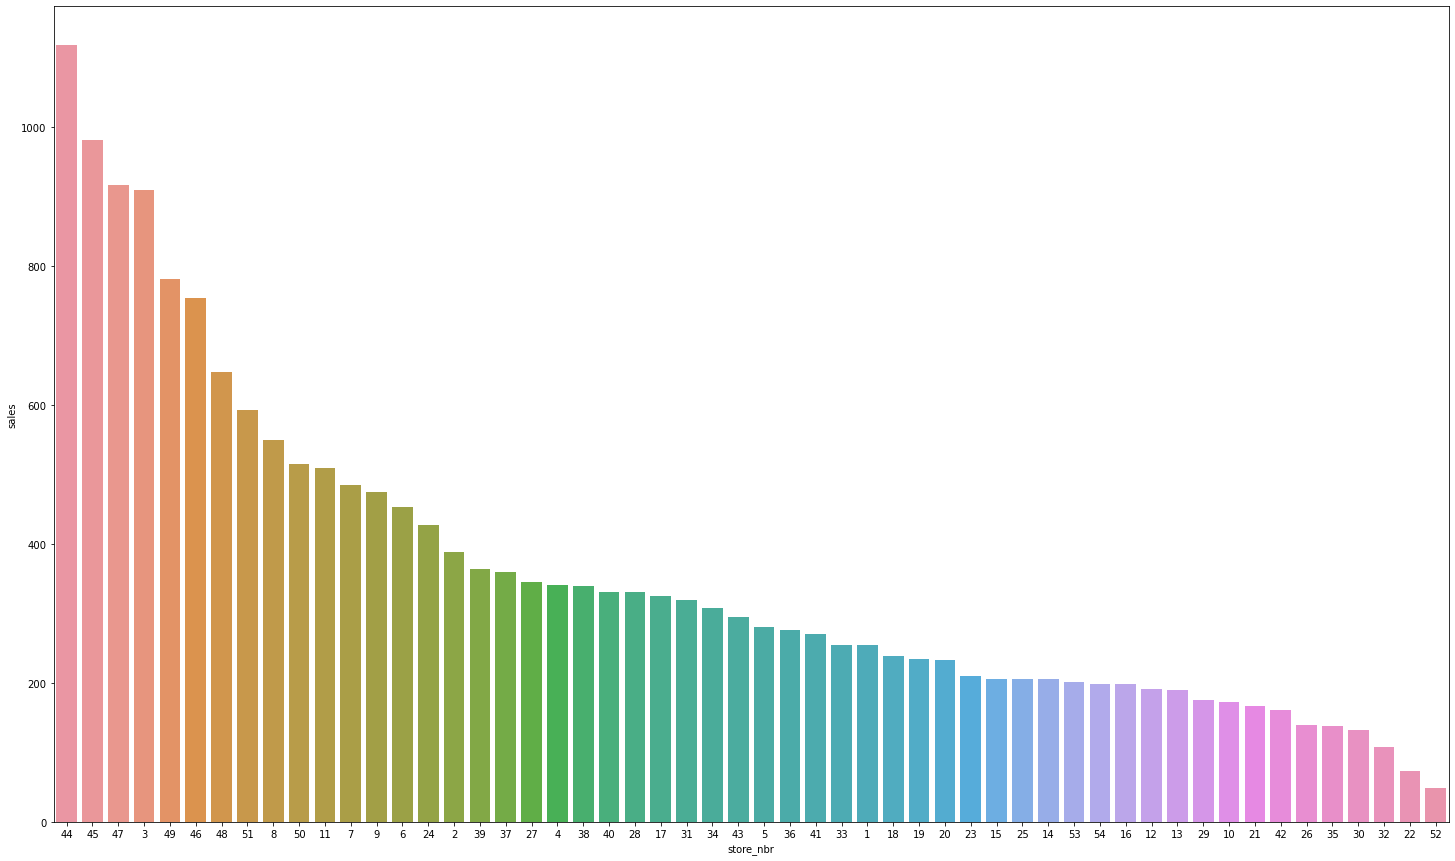

In [145]:
store_sales=train2.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
store_sales=pd.DataFrame(store_sales)
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x=store_sales.index,y='sales',data=store_sales,ax=None,ci=None,order=store_sales.index)

<AxesSubplot:xlabel='sales', ylabel='state'>

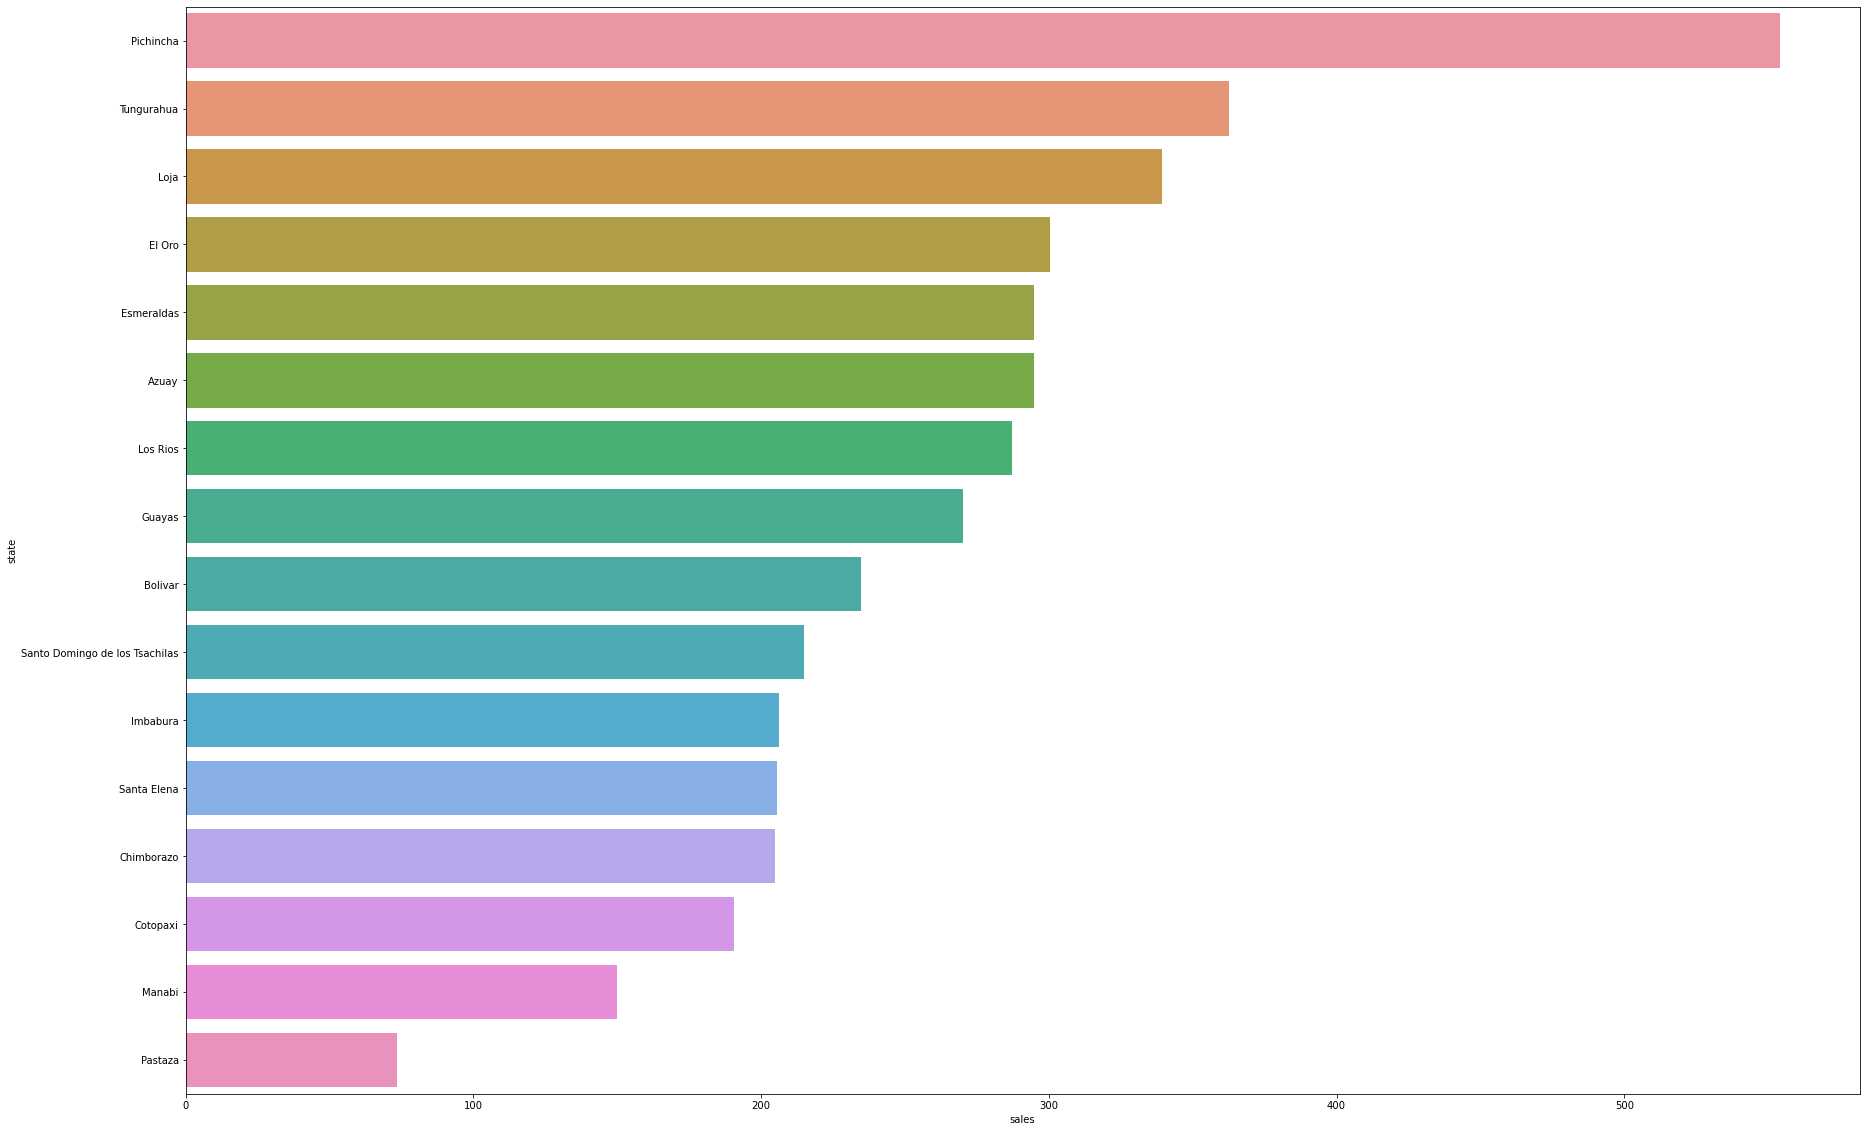

In [146]:
state_sales=train2.groupby(['state'])['sales'].mean().sort_values(ascending=False)
state_sales=pd.DataFrame(state_sales)
ax,f=plt.subplots(figsize=(30,20))
sns.barplot(x='sales',y=state_sales.index,data=state_sales,ax=None,ci=None)

In [53]:
#train1['date'] = pd.to_datetime(train1['date'], format = '%Y-%m-%d')
# train1[["year", "month", "day"]] = train1["date"].str.split("-", expand = True)

In [147]:
cat_cols = [colname for colname in train2.columns if train2[colname].dtype =='object' ]

In [148]:
cat_cols

['family', 'city', 'state', 'type']

In [149]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
for col in cat_cols:
    train2[col] = enc.fit_transform(train2[col])

In [166]:
train2.shape

(3000888, 13)

In [170]:
train2.to_csv('final_train.csv', index_label='id')

In [151]:
train2

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,year,month,day
0,2013-01-01,1,0,0.000,0,18,12,3,13,67.925589,2013,1,1
1,2013-01-01,1,1,0.000,0,18,12,3,13,67.925589,2013,1,1
2,2013-01-01,1,2,0.000,0,18,12,3,13,67.925589,2013,1,1
3,2013-01-01,1,3,0.000,0,18,12,3,13,67.925589,2013,1,1
4,2013-01-01,1,4,0.000,0,18,12,3,13,67.925589,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,28,438.133,0,18,12,1,6,47.570000,2017,8,15
3000884,2017-08-15,9,29,154.553,1,18,12,1,6,47.570000,2017,8,15
3000885,2017-08-15,9,30,2419.729,148,18,12,1,6,47.570000,2017,8,15
3000886,2017-08-15,9,31,121.000,8,18,12,1,6,47.570000,2017,8,15


In [154]:
test1 = pd.merge(test, stores, how='left', on='store_nbr')

In [155]:
test1.head()

,date,store_nbr,family,onpromotion,city,state,type,cluster
0,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13
1,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13
2,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13
3,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13
4,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13


In [156]:
test2 = pd.merge(test1, oil, how='left', on='date')
test2.head()

,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico
0,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8
1,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8
2,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8
3,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8
4,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8


In [157]:
test2.isnull().sum()

date              0
store_nbr         0
family            0
onpromotion       0
city              0
state             0
type              0
cluster           0
dcoilwtico     7128
dtype: int64

In [158]:
test2[["year", "month", "day"]] = test2["date"].str.split("-", expand = True).astype('int64')
from datetime import datetime
test2['date'] = pd.to_datetime(test2['date'], format = '%Y-%m-%d')

In [159]:
# observed null values in dcoilwtico column and replacing those null values to mean
test2.loc[(test2.dcoilwtico.isnull()), 'dcoilwtico'] = test2.dcoilwtico.mean()

In [160]:
test_cat_cols = [test_colname for test_colname in test2.columns if test2[test_colname].dtype =='object' ]
for test_col in test_cat_cols:
    test2[test_col] = enc.fit_transform(test2[test_col])

In [164]:
test2.dtypes

date           datetime64[ns]
store_nbr               int64
family                  int32
onpromotion             int64
city                    int32
state                   int32
type                    int32
cluster                 int64
dcoilwtico            float64
year                    int64
month                   int64
day                     int64
dtype: object

In [169]:
test2.to_csv('final_test.csv', index_label='id')